# Assignment 3 : Audio Modality

In [137]:
# imports
import librosa
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

## Step 1: Splitting Dataset

In [138]:
# returns what the emotion is if u pass in an label, returns label if you pass in an emotion
def get_label(input):
    emotions = ['angry.wav', 'fear.wav', 'happy.wav', 'sad.wav']
    for emotion in emotions:
        if (input.endswith(emotion)):
            return emotions.index(emotion)


In [139]:
# load in data
column_name = ['signal', 'sample_rate', 'emotion']
train_df = pd.DataFrame(columns=column_name)
test_df = pd.DataFrame(columns=column_name)
for directory in os.listdir('./data_folder/'):
    df2 = pd.DataFrame(columns=column_name)
    category = os.path.join('./data_folder/', directory)
    for file in os.listdir(category):
        x, y = librosa.load(os.path.join(category, file))
        df2.loc[len(df2.index)] = [x, y, get_label(file)]
    temp_train_df = df2.sample(frac = 0.7)
    temp_test_df = df2.drop(temp_train_df.index)
    train_df = pd.concat([train_df, temp_train_df], ignore_index = True)
    test_df = pd.concat([test_df, temp_test_df], ignore_index = True)

# display
display(train_df)
display(test_df)
test_df.to_csv('teststuff.csv')

,signal,sample_rate,emotion
0,"[0.00065848825, 0.0011394735, 0.00043571164, 0...",22050,0
1,"[2.8072704e-05, -0.0005174577, -0.00017186583,...",22050,0
2,"[-1.8565846e-05, -0.00015018662, -0.0002866530...",22050,0
3,"[-4.3933673e-05, -3.247396e-05, 0.00025287794,...",22050,0
4,"[0.00042105315, 0.0001480394, -0.00020609208, ...",22050,0
...,...,...,...
275,"[-3.8520593e-05, -1.0413954e-05, -0.0001875705...",22050,3
276,"[0.0002309264, 0.00011798484, 0.0003896647, 9....",22050,3
277,"[0.00022473547, 0.00028666743, 0.00021235364, ...",22050,3
278,"[0.00024491604, 0.00030691188, 0.00018553445, ...",22050,3


,signal,sample_rate,emotion
0,"[1.02944705e-05, -9.507153e-05, -0.00026222126...",22050,0
1,"[9.93622e-05, 0.00047651387, -7.619375e-05, 4....",22050,0
2,"[0.00051713426, 0.0002477837, -5.2414252e-05, ...",22050,0
3,"[0.0001366516, 0.0007045061, 0.0003257926, -0....",22050,0
4,"[-5.0554436e-06, -0.00017293949, -0.0001765027...",22050,0
...,...,...,...
115,"[0.00022686382, 0.00028263847, 0.00030925768, ...",22050,3
116,"[9.74542e-05, 0.00033995177, 0.0002949122, 0.0...",22050,3
117,"[-3.9386745e-05, -0.00034438947, -0.0002387476...",22050,3
118,"[7.4483934e-05, -1.1574295e-05, -5.2308525e-05...",22050,3


## Step 2: Exploratory Data Analysis

c:\Users\crescent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\crescent\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


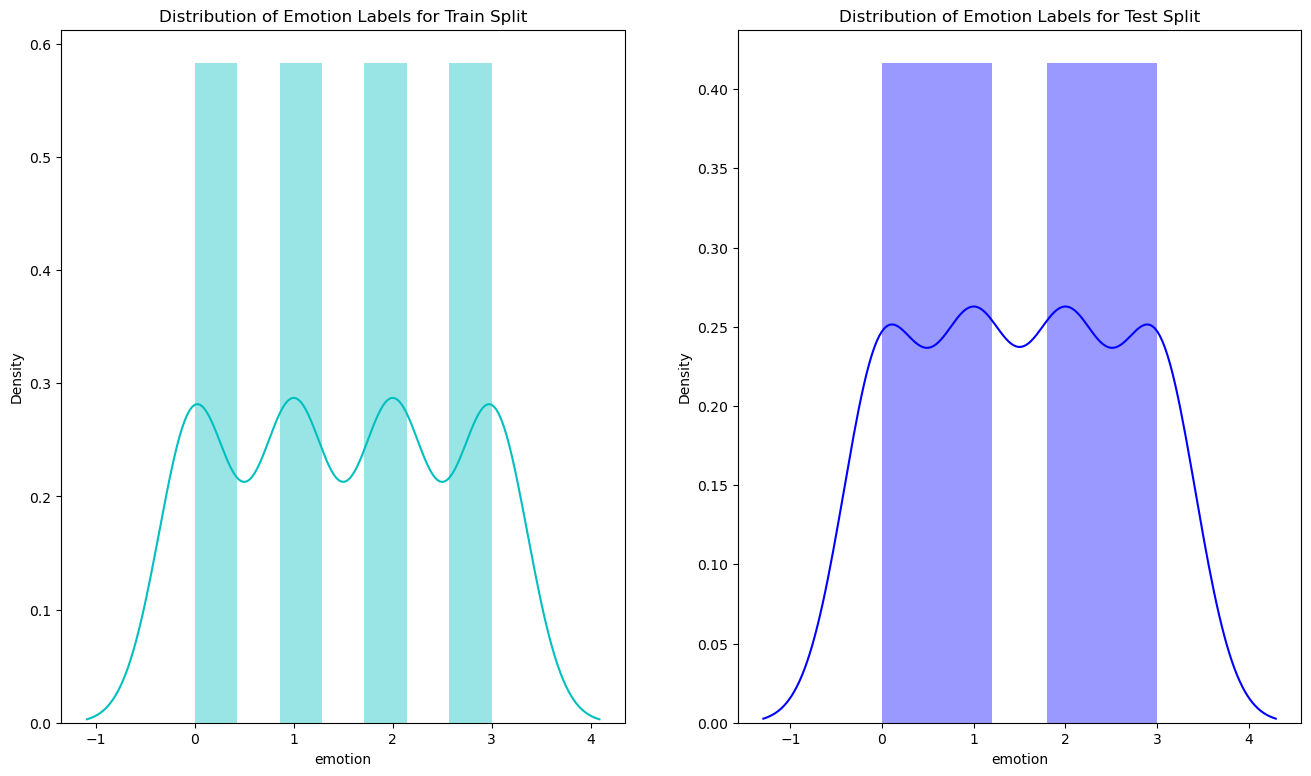

In [140]:
# plot SENTIMENT distributions for each file
fig = plt.figure(figsize=(16,9))

# first subplot (train)
sp1 = fig.add_subplot(121) 
sns.distplot(train_df['emotion'], color='c') # yes
sp1.set_title('Distribution of Emotion Labels for Train Split')

# second subplot (train)
sp2 = fig.add_subplot(122)
sns.distplot(test_df['emotion'], color='b') # yes
sp2.set_title('Distribution of Emotion Labels for Test Split')

plt.show()

In [141]:
# import Audio for listening
from IPython.display import Audio

In [142]:
# angry audio
Audio('./data_folder/angry/YAF_mood_angry.wav')

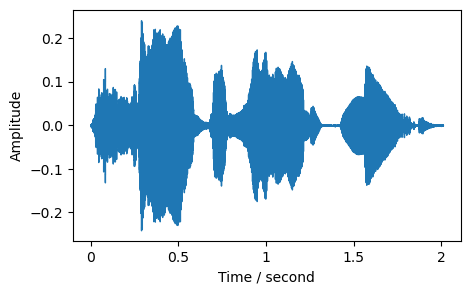

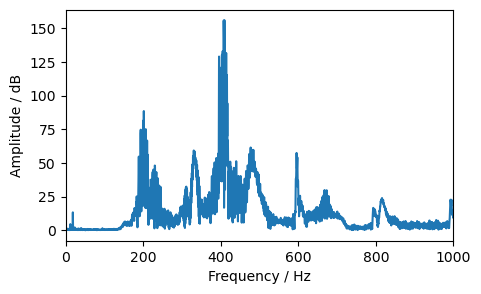

In [143]:
signal, sample_rate = librosa.load('./data_folder/angry/YAF_mood_angry.wav')

# plot audio files in time domain
plt.figure(figsize=(5,3))
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(figsize=(5,3))
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

In [144]:
# fear
Audio('./data_folder/fear/YAF_mood_fear.wav')

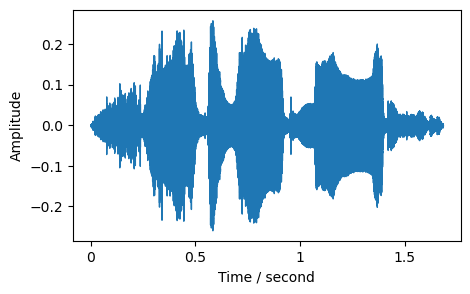

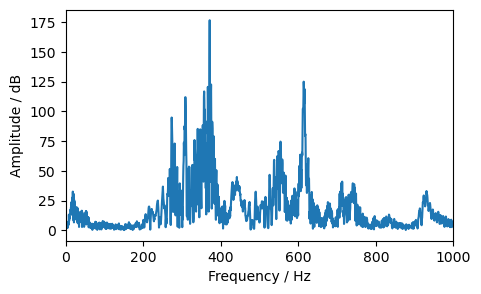

In [145]:
signal, sample_rate = librosa.load('./data_folder/fear/YAF_mood_fear.wav')

# plot audio files in time domain
plt.figure(figsize=(5,3))
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(figsize=(5,3))
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

In [146]:
# happy
Audio('./data_folder/happy/YAF_mood_happy.wav')

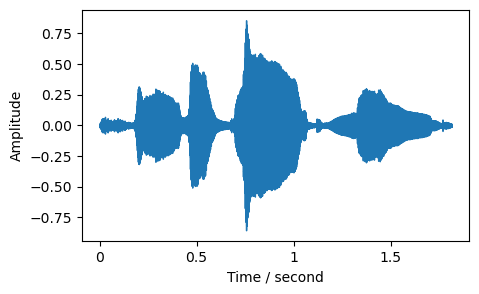

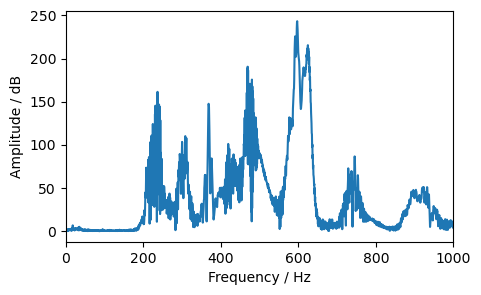

In [147]:
signal, sample_rate = librosa.load('./data_folder/happy/YAF_mood_happy.wav')

# plot audio files in time domain
plt.figure(figsize=(5,3))
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(figsize=(5,3))
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

In [148]:
# sad
Audio('./data_folder/sad/YAF_mood_sad.wav')

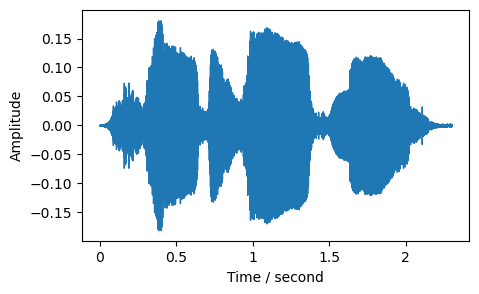

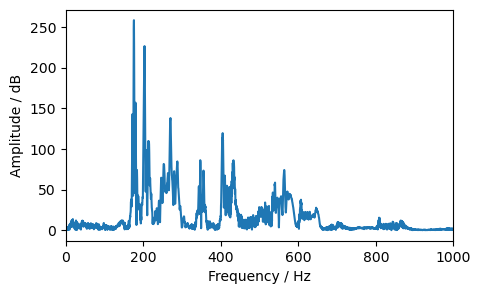

In [149]:
signal, sample_rate = librosa.load('./data_folder/sad/YAF_mood_sad.wav')

# plot audio files in time domain
plt.figure(figsize=(5,3))
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(figsize=(5,3))
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

## Step 3: Acoustic Feature Extraction

In [150]:
# imports
import pandas as pd

In [151]:
# feature extraction for train
train_features = []
for index, row in train_df.iterrows():
    # loudness
    S, phase = librosa.magphase(librosa.stft(row['signal']))
    rms = librosa.feature.rms(S=S)
    feature_loudness = np.mean([rms[0]])
    # mfccs
    feature_mfccs = np.mean(librosa.feature.mfcc(y=row['signal'], sr=row['sample_rate'], n_mfcc=12).T, axis=0)
    # zcr
    zcr = librosa.feature.zero_crossing_rate(y=row['signal'])
    feature_zcr = np.mean([zcr[0]])
    # chroma
    feature_chroma = np.mean(librosa.feature.chroma_stft(y=row['signal'], sr=row['sample_rate']).T, axis=0)
    # mel spectrogram
    feature_mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=row['signal'], sr=row['sample_rate'], n_mels=12).T, axis=0)
    # make feature matrix and append it
    features = np.hstack((feature_loudness, feature_mfccs, feature_zcr, feature_chroma, feature_mel_spectrogram))
    train_features.append(features)

# feature extraction for test
test_features = []
for index, row in test_df.iterrows():
    # loudness
    S, phase = librosa.magphase(librosa.stft(row['signal']))
    rms = librosa.feature.rms(S=S)
    feature_loudness = np.mean([rms[0]])
    # mfccs
    feature_mfccs = np.mean(librosa.feature.mfcc(y=row['signal'], sr=row['sample_rate'], n_mfcc=12).T, axis=0)
    # zcr
    zcr = librosa.feature.zero_crossing_rate(y=row['signal'])
    feature_zcr = np.mean([zcr[0]])
    # chroma
    feature_chroma = np.mean(librosa.feature.chroma_stft(y=row['signal'], sr=row['sample_rate']).T, axis=0)
    # mel spectrogram
    feature_mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=row['signal'], sr=row['sample_rate'], n_mels=12).T, axis=0)
    # make feature matrix and append it
    features = np.hstack((feature_loudness, feature_mfccs, feature_zcr, feature_chroma, feature_mel_spectrogram))
    test_features.append(features)

In [152]:
df_train_features = pd.DataFrame(np.array(train_features))
df_test_features = pd.DataFrame(np.array(test_features))

## Step 4: Feature Post-Processing

In [153]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

train_scale = MinMaxScaler(feature_range=[-1,1])
train_features_scaled = train_scale.fit_transform(train_features)
test_scale = MinMaxScaler(feature_range=[-1,1])
test_features_scaled = test_scale.fit_transform(test_features)

# feature averaging done on load
# feature concatenation done on load

pd.DataFrame(train_features_scaled).to_csv('train.csv')

## Step 5: Model Training

In [154]:
# import classifiers and metrics
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # SVM
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [155]:
# instantiate models
svm_model = SVC(probability=True)
nby_model = GaussianNB();
rfr_model = RandomForestClassifier();

In [156]:
# train models with loudness
svm_model.fit(np.array(train_features_scaled)[:,0].reshape(-1,1), train_df['emotion'].astype('int'))
nby_model.fit(np.array(train_features_scaled)[:,0].reshape(-1,1), train_df['emotion'].astype('int'))
rfr_model.fit(np.array(train_features_scaled)[:,0].reshape(-1,1), train_df['emotion'].astype('int'))

score = svm_model.score(np.array(test_features_scaled)[:,0].reshape(-1,1), test_df['emotion'].astype('int'))
score2 = nby_model.score(np.array(test_features_scaled)[:,0].reshape(-1,1), test_df['emotion'].astype('int'))
score3 = rfr_model.score(np.array(test_features_scaled)[:,0].reshape(-1,1), test_df['emotion'].astype('int'))

loud_svm_pred = svm_model.predict(np.array(test_features_scaled)[:,0].reshape(-1,1))
loud_nby_pred = nby_model.predict(np.array(test_features_scaled)[:,0].reshape(-1,1))
loud_rfr_pred = rfr_model.predict(np.array(test_features_scaled)[:,0].reshape(-1,1))

print(f'SVM model score: {100*score:.2f}%')
print(f'NBY model score: {100*score2:.2f}%')
print(f'RFR model score: {100*score3:.2f}%')

SVM model score: 57.50%
NBY model score: 56.67%
RFR model score: 53.33%


In [157]:
# train models with mfccs
svm_model.fit(np.array(train_features_scaled)[:,[1,12]], train_df['emotion'].astype('int'))
nby_model.fit(np.array(train_features_scaled)[:,[1,12]], train_df['emotion'].astype('int'))
rfr_model.fit(np.array(train_features_scaled)[:,[1,12]], train_df['emotion'].astype('int'))

score = svm_model.score(np.array(test_features_scaled)[:,[1,12]], test_df['emotion'].astype('int'))
score2 = nby_model.score(np.array(test_features_scaled)[:,[1,12]], test_df['emotion'].astype('int'))
score3 = rfr_model.score(np.array(test_features_scaled)[:,[1,12]], test_df['emotion'].astype('int'))

mfccs_svm_pred = svm_model.predict(np.array(test_features_scaled)[:,[1,12]])
mfccs_nby_pred = nby_model.predict(np.array(test_features_scaled)[:,[1,12]])
mfccs_rfr_pred = rfr_model.predict(np.array(test_features_scaled)[:,[1,12]])

print(f'SVM model score: {100*score:.2f}%')
print(f'NBY model score: {100*score2:.2f}%')
print(f'RFR model score: {100*score3:.2f}%')

SVM model score: 73.33%
NBY model score: 71.67%
RFR model score: 71.67%


In [158]:
# train models with zcr
svm_model.fit(np.array(train_features_scaled)[:,13].reshape(-1,1), train_df['emotion'].astype('int'))
nby_model.fit(np.array(train_features_scaled)[:,13].reshape(-1,1), train_df['emotion'].astype('int'))
rfr_model.fit(np.array(train_features_scaled)[:,13].reshape(-1,1), train_df['emotion'].astype('int'))

score = svm_model.score(np.array(test_features_scaled)[:,13].reshape(-1,1), test_df['emotion'].astype('int'))
score2 = nby_model.score(np.array(test_features_scaled)[:,13].reshape(-1,1), test_df['emotion'].astype('int'))
score3 = rfr_model.score(np.array(test_features_scaled)[:,13].reshape(-1,1), test_df['emotion'].astype('int'))

zcr_svm_pred = svm_model.predict(np.array(test_features_scaled)[:,13].reshape(-1,1))
zcr_nby_pred = nby_model.predict(np.array(test_features_scaled)[:,13].reshape(-1,1))
zcr_rfr_pred = rfr_model.predict(np.array(test_features_scaled)[:,13].reshape(-1,1))

print(f'SVM model score: {100*score:.2f}%')
print(f'NBY model score: {100*score2:.2f}%')
print(f'RFR model score: {100*score3:.2f}%')

SVM model score: 32.50%
NBY model score: 43.33%
RFR model score: 34.17%


In [159]:
# train models with chroma
svm_model.fit(np.array(train_features_scaled)[:,[14,25]], train_df['emotion'].astype('int'))
nby_model.fit(np.array(train_features_scaled)[:,[14,25]], train_df['emotion'].astype('int'))
rfr_model.fit(np.array(train_features_scaled)[:,[14,25]], train_df['emotion'].astype('int'))

score = svm_model.score(np.array(test_features_scaled)[:,[14,25]], test_df['emotion'].astype('int'))
score2 = nby_model.score(np.array(test_features_scaled)[:,[14,25]], test_df['emotion'].astype('int'))
score3 = rfr_model.score(np.array(test_features_scaled)[:,[14,25]], test_df['emotion'].astype('int'))

chroma_svm_pred = svm_model.predict(np.array(test_features_scaled)[:,[14,25]])
chroma_nby_pred = nby_model.predict(np.array(test_features_scaled)[:,[14,25]])
chroma_rfr_pred = rfr_model.predict(np.array(test_features_scaled)[:,[14,25]])

print(f'SVM model score: {100*score:.2f}%')
print(f'NBY model score: {100*score2:.2f}%')
print(f'RFR model score: {100*score3:.2f}%')

SVM model score: 63.33%
NBY model score: 61.67%
RFR model score: 50.83%


In [160]:
# train models with mel spectro
svm_model.fit(np.array(train_features_scaled)[:,[26,37]], train_df['emotion'].astype('int'))
nby_model.fit(np.array(train_features_scaled)[:,[26,37]], train_df['emotion'].astype('int'))
rfr_model.fit(np.array(train_features_scaled)[:,[26,37]], train_df['emotion'].astype('int'))

score = svm_model.score(np.array(test_features_scaled)[:,[26,37]], test_df['emotion'].astype('int'))
score2 = nby_model.score(np.array(test_features_scaled)[:,[26,37]], test_df['emotion'].astype('int'))
score3 = rfr_model.score(np.array(test_features_scaled)[:,[26,37]], test_df['emotion'].astype('int'))

melsp_svm_pred = svm_model.predict(np.array(test_features_scaled)[:,[26,37]])
melsp_nby_pred = nby_model.predict(np.array(test_features_scaled)[:,[26,37]])
melsp_rfr_pred = rfr_model.predict(np.array(test_features_scaled)[:,[26,37]])

print(f'SVM model score: {100*score:.2f}%')
print(f'NBY model score: {100*score2:.2f}%')
print(f'RFR model score: {100*score3:.2f}%')

SVM model score: 60.00%
NBY model score: 54.17%
RFR model score: 49.17%


In [161]:
# train models with concatenation
svm_model.fit(train_features_scaled, train_df['emotion'].astype('int'))
nby_model.fit(train_features_scaled, train_df['emotion'].astype('int'))
rfr_model.fit(train_features_scaled, train_df['emotion'].astype('int'))

score = svm_model.score(test_features_scaled, test_df['emotion'].astype('int'))
score2 = nby_model.score(test_features_scaled, test_df['emotion'].astype('int'))
score3 = rfr_model.score(test_features_scaled, test_df['emotion'].astype('int'))

all_svm_pred = svm_model.predict(test_features_scaled)
all_nby_pred = nby_model.predict(test_features_scaled)
all_rfr_pred = rfr_model.predict(test_features_scaled)

print(f'SVM model score: {100*score:.2f}%')
print(f'NBY model score: {100*score2:.2f}%')
print(f'RFR model score: {100*score3:.2f}%')

SVM model score: 100.00%
NBY model score: 99.17%
RFR model score: 98.33%


## Step 6: Model Evaluation

In [162]:
# print classification reports

print('Loudness SVM Report:')
print(classification_report(test_df['emotion'].astype('int'), loud_svm_pred, zero_division=True))
print('Loudness NBY Report:')
print(classification_report(test_df['emotion'].astype('int'), loud_nby_pred, zero_division=True))
print('Loudness RFR Report:')
print(classification_report(test_df['emotion'].astype('int'), loud_rfr_pred, zero_division=True))

print('MFCCS SVM Report:')
print(classification_report(test_df['emotion'].astype('int'), mfccs_svm_pred, zero_division=True))
print('MFCCS NBY Report:')
print(classification_report(test_df['emotion'].astype('int'), mfccs_nby_pred, zero_division=True))
print('MFCCS RFR Report:')
print(classification_report(test_df['emotion'].astype('int'), mfccs_rfr_pred, zero_division=True))

print('ZCR SVM Report:')
print(classification_report(test_df['emotion'].astype('int'), zcr_svm_pred, zero_division=True))
print('ZCR NBY Report:')
print(classification_report(test_df['emotion'].astype('int'), zcr_nby_pred, zero_division=True))
print('ZCR RFR Report:')
print(classification_report(test_df['emotion'].astype('int'), zcr_rfr_pred, zero_division=True))

print('Chroma SVM Report:')
print(classification_report(test_df['emotion'].astype('int'), chroma_svm_pred, zero_division=True))
print('Chroma NBY Report:')
print(classification_report(test_df['emotion'].astype('int'), chroma_nby_pred, zero_division=True))
print('Chroma RFR Report:')
print(classification_report(test_df['emotion'].astype('int'), chroma_rfr_pred, zero_division=True))

print('Melspectrogram SVM Report:')
print(classification_report(test_df['emotion'].astype('int'), melsp_svm_pred, zero_division=True))
print('Melspectrogram NBY Report:')
print(classification_report(test_df['emotion'].astype('int'), melsp_nby_pred, zero_division=True))
print('Melspectrogram RFR Report:')
print(classification_report(test_df['emotion'].astype('int'), melsp_rfr_pred, zero_division=True))

Loudness SVM Report:
              precision    recall  f1-score   support

           0       0.43      0.70      0.53        30
           1       1.00      0.00      0.00        30
           2       0.56      0.90      0.69        30
           3       0.91      0.70      0.79        30

    accuracy                           0.57       120
   macro avg       0.73      0.57      0.50       120
weighted avg       0.73      0.57      0.50       120

Loudness NBY Report:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        30
           1       0.43      0.10      0.16        30
           2       0.53      0.90      0.67        30
           3       0.82      0.77      0.79        30

    accuracy                           0.57       120
   macro avg       0.56      0.57      0.52       120
weighted avg       0.56      0.57      0.52       120

Loudness RFR Report:
              precision    recall  f1-score   support

           0